# Assignment #2 - Classification

<font color="red"> <b> Due: Oct 15 (Tuesday) 11:00 pm </b> </font>

<font color="blue"> Abhilash Mandlekar </font>

# I. Introduction

The objectie of this assignment is to implement the modified perceptron that is pocket algorithm, Linear Discriminant analysis (LDA), Quadratic Discriminant analysis (QDA), and Logistic regression algorithms. These algorithms are classification algorithms.

In this assignment I am using "Intrusion Detection in Network" dataset to implement the above algorithms. The first three algorithms that is pocket algorithm, LDA and QDA are designed for the binary classification. Whereas the logistic regression works well for multi-class classification.

# II. Data

Here I am reusing the data used in Assignment 0. I have used "KDDCUP99" dataset for classification of computer network attacks. It can be used for intrusion detection in a computer network system. The dataset considers total of 42 features, and has 26000 rows.

The dataset contains the information of traffic in a computer network system. The dataset has most of the data for normal traffic. There are majorly 4 types of attacks as the labels in this dataset. Those are denial-of-service (**DOS**) attack, unauthorized access from a remote machine (**R2L**) attack, unauthorized access to local superuser (root) privileges (**U2R**), surveillance and other **probing** attacks.

These attacks are further classified in the following types:

1) The attacks black, land, neptune, pod, smurf and teardrop are the types of DOS attacks.<br>
2) The attacks like buffer_overflow, loadmodule, perl, rootkit are the types of U2R attacks.<br>
3) ftp_write, guess_passwd, imap, multihop, phf, spf, warezclient, warezmaster are the types of R2L attacks.<br>
4) nmap, ipsweep, portsweep, satan are the probing attacks.<br>

This network traffic dataset monitors various aspects of client as well as server machine such as protocol used by client system, their login attempts on server, number of failed login attempts, connection time on the server etc.

### Reading the data

Since the data is in excel format, I have used pandas read_excel method to get the data in pandas dataframe. The column 'label' in the dataset contains the sub-categories of types of network attack.

In [2]:
import pandas as pd
import numpy as np
import numpy as np
from copy import deepcopy as copy 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import math
class ReadNetworkTrafficData():
    def trafficData(self, fname):
        df = pd.read_excel(fname)
        df = df.dropna()
        return df
    
    def removeCols(self,intr_df):
        intr_df = intr_df.drop(columns=['service', 'flag', 'lsu_attempted', 'lnum_outbound_cmds', 'is_host_login'])
        print("Columns are removed")
        return intr_df

In [52]:
rwd = ReadNetworkTrafficData()
intr_df = rwd.trafficData('Intrusion_detection_dataset.xlsx')
print(intr_df.shape)

intr_df = rwd.removeCols(intr_df)
#print(intr_df.s)
print(intr_df.shape)

(26013, 42)
Columns are removed
(26013, 37)


## Pre-processing the data

The raw dataset only gives the information about the sub-categories of network attacks like neptune, nmap, ipsweep attack but do not provide the main category of network attack. The pre-proceesing is needed to get the main category of the network attack. In the below code, I have taken a copy of a column 'label' in another column 'Main_label' and replaced the values in the main label by main categories of attacks (DOS, R2L, U2R, probing).

The data is also pre-processed to show PIE chart. I want to see which protocol is most prone to network attack, and hence created the grouping of data (mapping between protocol and type of attack). 

The below pre-processing is very useful because it categories the data in 5 classes namely DOS, R2L, U2R, probing and Normal traffic (No attack).

In [53]:
intr_df['Main_label'] = intr_df['label']

intr_df.loc[intr_df.Main_label == "back", 'Main_label'] = "DOS"
intr_df.loc[intr_df.Main_label == "land", 'Main_label'] = "DOS"
intr_df.loc[intr_df.Main_label == "neptune", 'Main_label'] = "DOS"
intr_df.loc[intr_df.Main_label == "pod", 'Main_label'] = "DOS"
intr_df.loc[intr_df.Main_label == "smurf", 'Main_label'] = "DOS"
intr_df.loc[intr_df.Main_label == "teardrop", 'Main_label'] = "DOS"

intr_df.loc[intr_df.Main_label == "normal", 'Main_label'] = "Normal traffic (No attack)"

intr_df.loc[intr_df.Main_label == "buffer_overflow", 'Main_label'] = "U2R"
intr_df.loc[intr_df.Main_label == "loadmodule", 'Main_label'] = "U2R"
intr_df.loc[intr_df.Main_label == "perl", 'Main_label'] = "U2R"
intr_df.loc[intr_df.Main_label == "rootkit", 'Main_label'] = "U2R"

intr_df.loc[intr_df.Main_label == "ftp_write", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "guess_passwd", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "imap", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "multihop", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "phf", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "spf", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "warezclient", 'Main_label'] = "R2L"
intr_df.loc[intr_df.Main_label == "warezmaster", 'Main_label'] = "R2L"

intr_df.loc[intr_df.Main_label == "nmap", 'Main_label'] = "probe"
intr_df.loc[intr_df.Main_label == "ipsweep", 'Main_label'] = "probe"
intr_df.loc[intr_df.Main_label == "portsweep", 'Main_label'] = "probe"
intr_df.loc[intr_df.Main_label == "satan", 'Main_label'] = "probe"



# Pre-processing to show pie chart 

attack_count = []
df2_temp = intr_df[(intr_df.protocol_type=="tcp") & (intr_df.Main_label=="DOS")]
attack_count.append(df2_temp['Main_label'].value_counts()[0])

df3_temp = intr_df[(intr_df.protocol_type=="tcp") & (intr_df.Main_label=="R2L")]
attack_count.append(df3_temp['Main_label'].value_counts()[0])

df4_temp = intr_df[(intr_df.protocol_type=="tcp") & (intr_df.Main_label=="U2R")]
attack_count.append(df4_temp['Main_label'].value_counts()[0])

df5_temp = intr_df[(intr_df.protocol_type=="tcp") & (intr_df.Main_label=="probe")]
attack_count.append(df5_temp['Main_label'].value_counts()[0])

df6_temp = intr_df[(intr_df.protocol_type=="udp") & (intr_df.Main_label=="DOS")]
attack_count.append(df6_temp['Main_label'].value_counts()[0])

# there is no data for protocol udp and type r2l

df8_temp = intr_df[(intr_df.protocol_type=="udp") & (intr_df.Main_label=="U2R")]
attack_count.append(df8_temp['Main_label'].value_counts()[0])

df9_temp = intr_df[(intr_df.protocol_type=="udp") & (intr_df.Main_label=="probe")]
attack_count.append(df9_temp['Main_label'].value_counts()[0])

df10_temp = intr_df[(intr_df.protocol_type=="icmp") & (intr_df.Main_label=="DOS")]
attack_count.append(df10_temp['Main_label'].value_counts()[0])

# there is no data for protocol_type "icmp"  & attack "R2L"

# there is no data for protocol_type "icmp"  & attack "U2R"

df13_temp = intr_df[(intr_df.protocol_type=="icmp") & (intr_df.Main_label=="probe")]
attack_count.append(df13_temp['Main_label'].value_counts()[0])

print("The Network attacks and there counts: ")
print(intr_df['Main_label'].value_counts())

The Network attacks and there counts: 
DOS                           13510
Normal traffic (No attack)     7787
probe                          3546
R2L                            1122
U2R                              48
Name: Main_label, dtype: int64


### Visualization of Data
For visualization of this classification data, count plots, bar graphs and pie charts are plotted using the seaborn and matplotlib libraries.
#### 1. Count plot ( Count of network attack Vs Type of network attacks)

The count plot below describes the number of network attack for each sub-category of attack.<br>
We can clearly see the most frequest attack is **Neptune** attack. The second most frequent network attack is **smurf** attack.<br>
Both of the above network attacks comes under denial-of-service (**DOS**) and is the most frequent type of network attack.

Text(0.5, 1.0, 'Distribution of Attacks in Computer Network\n')

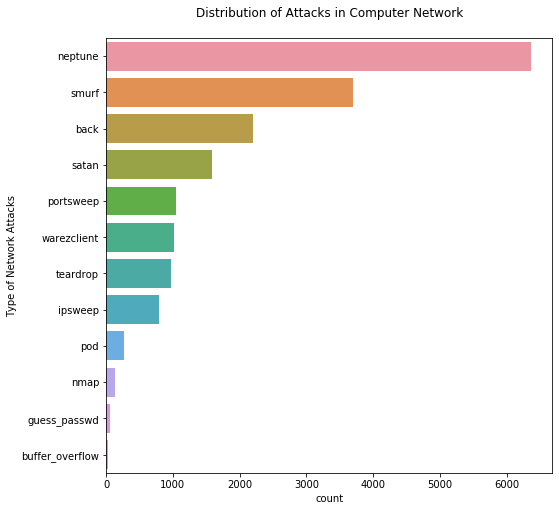

In [219]:
fig, ax = plt.subplots(figsize=(8,8))
plot = sb.countplot(y=intr_df['label'], order=[
    'neptune', 'smurf', 'back',
    'satan','portsweep','warezclient', 'teardrop','ipsweep',
    'pod','nmap', 'guess_passwd','buffer_overflow'])
plot.set_ylabel('Type of Network Attacks')
plot.set_title('Distribution of Attacks in Computer Network\n')

#### 2. Bar graph ( Network Attacks vs No. of connections to same service as the current connection)

The feature "No. of connections to same service as the current connection" (column 'srv_count') is found to be most prominant in case of DOS attacks. The below bar graph shows its number in each type of network attacks.

We can see that when the No. of connections to same service as the current connection is higher the system is more prone to DOS attack. This no. is also higher for the probe and R2L network attacks than the normal traffic.

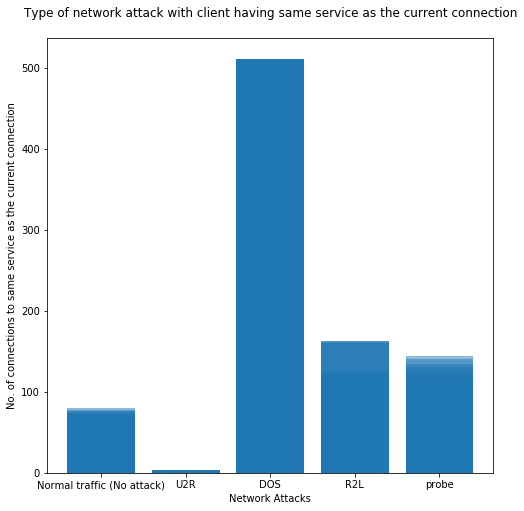

In [220]:
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(intr_df['Main_label'], intr_df['srv_count'], align='center', alpha=0.5)
plt.ylabel("No. of connections to same service as the current connection")
plt.xlabel("Network Attacks")
plt.title("Type of network attack with client having same service as the current connection\n")
plt.show()

#### 3. Pie chart (Protocol and type of network attack)

This pie chart shows which network protocol is more prone to attack. It shows percentage of the same in the below pie chart.<br>
It is clear from the graph that DOS attack is very common on TCP protocol.

(-1.1004421009256227,
 1.1000210524250296,
 -1.108735231852545,
 1.1201565018573931)

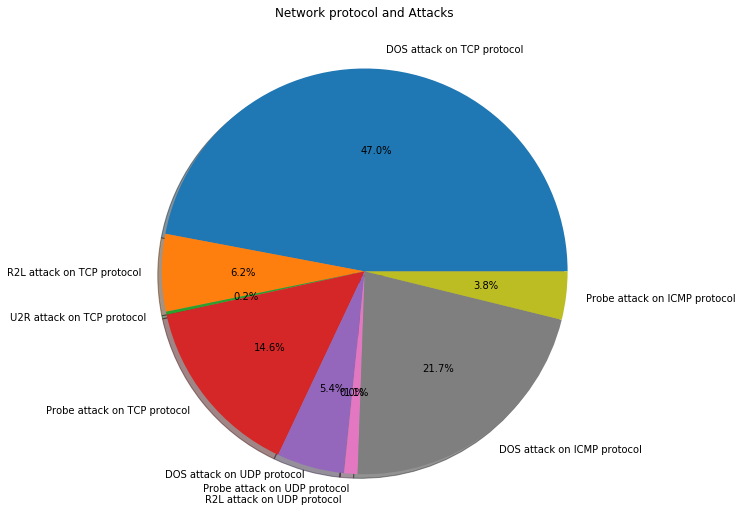

In [221]:
fig, ax1 = plt.subplots(figsize=(8,8))
attrs1 = ['DOS attack on TCP protocol', 'R2L attack on TCP protocol', 'U2R attack on TCP protocol', 'Probe attack on TCP protocol',
    'DOS attack on UDP protocol\n\n','\nR2L attack on UDP protocol', 'Probe attack on UDP protocol\n',
        'DOS attack on ICMP protocol','Probe attack on ICMP protocol']
ax1.pie(attack_count, labels=attrs1, autopct='%1.1f%%', shadow=True)
plt.title('Network protocol and Attacks\n\n')
ax1.axis('equal')

#### 4. Bar Graph (Type of network attack vs Bytes on destination server)

The below graph shows that the bytes on destination server is high for clients in R2L attack. It is as high as 5 million bytes.<br>
Whenever these bytes are large in number, the system is more prone to R2L attack.

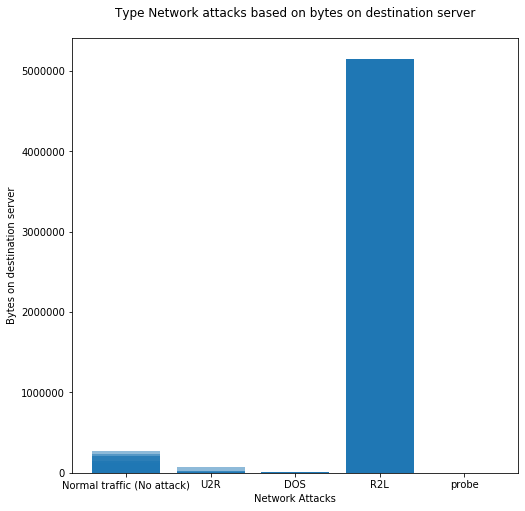

In [222]:
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(intr_df['Main_label'], intr_df['dst_bytes'], align='center', alpha=0.5)
plt.ylabel("Bytes on destination server")
plt.xlabel("Network Attacks")
plt.title("Type Network attacks based on bytes on destination server\n")
plt.show()

### Preliminary Observation

We can make the following observation from the above graphs:<br>
1) The most common attack in this dataset is DOS attack with more than 13000 rows.<br>
2) The pie chart shows the TCP protocol is more prone to network attacks.<br>
3) The features such as "Number of connection to same service as the current connection", "Bytes on destination server" are the useful features to detect the intrusion in the system.

In [54]:
qda = ["DOS", "Normal traffic (No attack)"]
intr_df_qda = intr_df
intr_df_qda = intr_df.loc[intr_df['Main_label'].isin(qda)]
#intr_df_qda = intr_df.loc[intr_df['Main_label'] == "R2L"]
print(intr_df_qda['Main_label'].value_counts())


intr_df_qda['target'] = intr_df_qda['Main_label']
intr_df_qda.loc[intr_df_qda['target'] == 'DOS', 'target'] = 1
intr_df_qda.loc[intr_df_qda['target'] == 'Normal traffic (No attack)', 'target'] = 0
#intr_df_qda = intr_df_qda_t.drop(columns=['DOS', 'Normal traffic (No attack)'])
print(intr_df_qda['target'].value_counts())


DOS                           13510
Normal traffic (No attack)     7787
Name: Main_label, dtype: int64
1    13510
0     7787
Name: target, dtype: int64


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Encoding a column

In [55]:
new_df_x = pd.get_dummies(intr_df['protocol_type'],prefix='',prefix_sep='')
print(new_df_x.shape)
intr_df = intr_df.drop(columns=['protocol_type'])

new_df_t = pd.get_dummies(intr_df['Main_label'],prefix='',prefix_sep='')
print(new_df_t.shape)


intr_df_x = intr_df.iloc[:,0:35]
intr_df_t = intr_df.iloc[:,35:36]

intr_df_qda_x = intr_df.iloc[:,0:35]
intr_df_qda_t = intr_df.iloc[:,35:36]

intr_df_x = intr_df_x.join(new_df_x)
intr_df_t = intr_df_t.join(new_df_t)


intr_df_qda_x = intr_df_qda.loc[intr_df_qda['target'].isin([0,1])]
intr_df_qda_t = intr_df_qda['target']

intr_df_t = intr_df_t.drop(columns=['label'])
intr_df_qda_t = intr_df_qda_t.drop(columns=['label'])

(26013, 3)
(26013, 5)


## Partitioning the data

In [56]:
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        print("k....r",k,r)
        nrows = int(round(N * r))  # number of rows
        print("rows: ",nrows)
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts


In [57]:
Xlst, Tlst = partition(pd.DataFrame(intr_df_x), pd.DataFrame(intr_df_t))

intr_train_x, intr_test_x = [i.values for i in Xlst]
intr_train_t, intr_test_t = [j.values for j in Tlst]

print("Train X",intr_train_x.shape)
print("Test X",intr_train_t.shape)
print("Train T",intr_test_x.shape)
print("Test T",intr_test_t.shape)

k....r 0 0.8
rows:  20810
k....r 1 0.2
rows:  5203
Train X (20810, 38)
Test X (20810, 5)
Train T (5203, 38)
Test T (5203, 5)


# III. Method

## Summary of Classification models
### Pocket algorithm:

Pocket algorithm is a modified version of **"Perceptron Learning"** algorithm. In this algorithm, the best weights are copied and stored to another variable. Best weights are calculated by comparision with the preivious weights.

This is a binary classification algorithm, and converges for linearly seperable data. We can update the weights by using the formula below:<br>
$$ w^{(k+1)} = w^{(k)} + \alpha t_i x_i$$

For training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best.

### QDA
QDA is a discriminant analysis algorithm, and works for binary classification problem. Here, the data is assumed to have Gaussian Distribution. The posterior and prior probabilties are calculated by first dividing the datasets into two classes. First class is a positive class having all the features with values as one. The other class is a negative with their values in target as zero. The prior probabilities are calculted for each of these classes.

The formula for calculating the discriminant is:


$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $ \tilde{x} $, we can predict the label with
$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

### LDA
LDA is similar to QDA algorithm and it is a binary classifier too. The LDA is more generalized algorithm than QDA with only one sigma. In this algorithm each class has the same covarience matrix.

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
 \boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

### Logistic Regression
Logistic Regression is a very powerful algorithm for multi-class classification. The range of logistic regression is zero to one and it is done by using the softmax function.

The output from the hypothesis is the estimated probability. This is used to infer how confident can predicted value be actual value when given an input X. 

We can update the weight matrix using the formula below:
$$
w \leftarrow w + \alpha Xm^\top \Big(  Tm - g(Xm)\Big).
$$


### A. Super Classs Definition

In [10]:

from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
            
        
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX)/self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

## Explanation of code
We have an abstract class here called Classifier() which has the implementation of some methods like check_matrix, add_ones, normalize which can be used directly in our code by calling those methods. The normalize data method is used to normalize the train and test data. The implementation of train and use is not given here hence the class remains abtract.<br>

The super class of this class is BaseModel() class.
The method add_ones adds the vector of 1 before the actual features of matrix, that is it is used to add the bias. The method check_matrix is used to check if the matrix is 2d or not, it throws the error if not so.

### B. Pocket Algorithm


In [216]:
copy_intr_df_qda_x = intr_df_qda_x 

intr_df_qda_x = pd.DataFrame(intr_df_qda_x)

intr_df_qda_x = intr_df_qda_x.drop(columns=['protocol_type', 'wrong_fragment', 'urgent', 'num_failed_logins', 'lnum_root', 'lnum_shells','dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'label', 'Main_label'])

# print(intr_df_qda_x.loc[:5])
#intr_df_qda_x = intr_df_qda_x.drop(columns=[1, 5, 6, 8, 14, 36, 37])
intr_df_qda_x = (intr_df_qda_x - intr_df_qda_x.mean())/ intr_df_qda_x.max() - intr_df_qda_x.min()

Xlst, Tlst = partition(pd.DataFrame(intr_df_qda_x), pd.DataFrame(intr_df_qda_t))
intr_train_qda_x, intr_test_qda_x = [i.values for i in Xlst]
intr_train_qda_t, intr_test_qda_t = [j.values for j in Tlst]

print(intr_df_qda_x.shape)
print(intr_df_qda_x.columns)

intr_train_qda_x = pd.DataFrame(intr_train_qda_x)
intr_train_qda_t = pd.DataFrame(intr_train_qda_t)

intr_test_qda_x = pd.DataFrame(intr_test_qda_x)
intr_test_qda_t = pd.DataFrame(intr_test_qda_t)

# intr_train_qda_x = intr_train_qda_x.drop(columns=[1, 5, 6, 8, 14, 36, 37])
# intr_test_qda_x = intr_test_qda_x.drop(columns=[1, 5, 6, 8, 14, 36, 37])

k....r 0 0.8
rows:  17038
k....r 1 0.2
rows:  4259
(21297, 29)
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'hot', 'logged_in',
       'lnum_compromised', 'lroot_shell', 'lnum_file_creations',
       'lnum_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')


In [217]:
class PocketAlgo(Classifier):
    def __init__(self):
        self.w = 0
        self.w_pocket = 0
        self.alpha = 0.1
    
    def compare(self, X, T, w, wp):
        y = np.sign(X @ w.T)
        yp = np.sign(X @ wp.T)
        return 1 if np.sum(y.loc[0] == T.loc[0]) >= np.sum(yp.loc[0] == T.loc[0]) else -1

        
    def train(self, X, T):
        x_normal = X
        #print(x_normal[:5])
        y = np.zeros(T.shape[1])
        #print("T shape",T.shape)
        N = x_normal.shape[0]

        self.w = np.zeros((T.shape[1], x_normal.shape[1]))
        self.w = self.w.flatten()
        self.w_pocket = copy(self.w)

        
        for i in range(10):
            print("Training i: ", i)
            converged = True
            for k in range(8000): #range(N):
#                 if (k%1000==0):
#                     print(self.w)
                #print("x_normal ", x_normal.loc[k])
                y = self.w @ x_normal.loc[k]
                
                 
                if np.sign(y) != np.sign(T.loc[k][0]):
                    self.w += (self.alpha * T.loc[k][0] * x_normal.loc[k].T)
                    converged = False
                    ##### additional for pocket algorithm 
                    if self.compare(x_normal, T,self.w, self.w_pocket) > 0: 
                        self.w_pocket[:] = self.w[:]

            if converged:
                print("converged at ", i)
                return(self.w_pocket)
            
        return self.w
            
    def use(self, X):
        return X @ self.w_pocket



## Explanation of code (Pocket Algorithm)

The above code is for implementation of Pocket algorithm. As the model takes too long to converge, I am running total 10 epoches on training data. Since I have considered almost all the features (29 out of 35) the matrix becomes large and the program take long time to run each epoch.<br>
In train method I am training the data with the formula for updation of weights in pocket algorithm. The best weights are considered and stored in the variable W_pocket.<br>
The Use method predicts the values of new data by using the previously calculated weights.<br>
Compare method just compares the predicted value by both the weights (current weight and best weight) if current weight performs better, then this weight is returned to packet.<br>
[Note: Here, I took same variable name "intr_train_qda_x" for training feature data for implementaion of all the binary classifiers, even though I am implementing pocket algorithm here.]

In [218]:
pka = PocketAlgo()

#intr_train_qda_x = (intr_train_qda_x - intr_train_qda_x.mean()) / (intr_train_qda_x.max() - intr_train_qda_x.min())
w_pckt = pka.train(intr_train_qda_x, intr_train_qda_t)
print(w_pckt)

Training i:  0
Training i:  1
Training i:  2
Training i:  3
Training i:  4
Training i:  5
Training i:  6
Training i:  7
Training i:  8
Training i:  9
0    -0.000010
1    -0.008990
2    -0.000879
3    -0.000014
4    -0.000734
5    -0.045870
6    -0.005005
7    -0.000023
8    -0.000019
9    -0.000028
10   -0.000131
11   -0.068159
12   -0.057357
13   -0.000405
14   -0.000084
15   -0.030358
16   -0.030920
17    0.028609
18   -0.002171
19   -0.006149
20   -0.119655
21   -0.161103
22   -0.064420
23   -0.001258
24   -0.019865
25   -0.000047
26   -0.031465
27   -0.030452
28    0.036564
Name: 7787, dtype: float64


## Experiment (Pocket Algorithm)
Below is the code for accuracy of pocket algorithm. Here I have considered almost all features, and run the training only for 10 epoches, hence the accuracy of this model is low.
I have printed the weights matrix and stored in variable w_pckt, which can be used to predict the future values/ test data.

In [219]:

y_pckt = intr_test_qda_x @ w_pckt

print(intr_test_qda_t.shape)
print( y_pckt.shape)
print("Accuracy: ", 100 - np.mean(np.abs(intr_test_qda_t[0] - y_pckt)) * 100, "%")

(4259, 1)
(4259,)
Accuracy:  49.054584165592686 %


Below is the graph of predicted values by pocket algorithm.

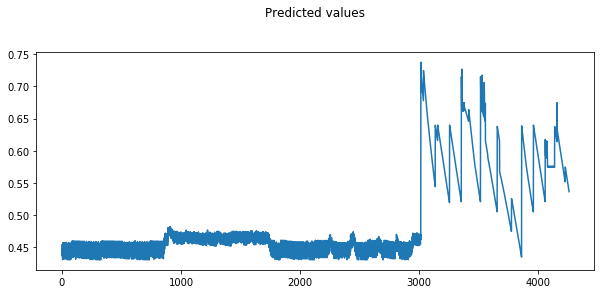

In [220]:
fig = plt.figure(figsize=(10, 4))
plt.title("Predicted values\n \n")
plt.plot(y_pckt)
plt.show()

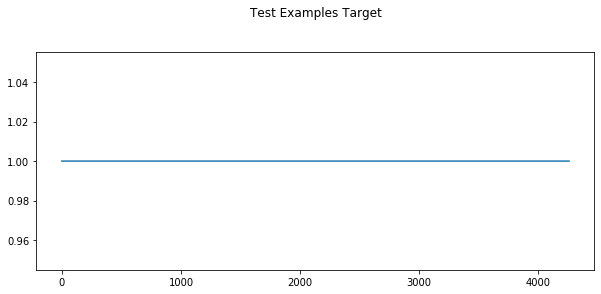

In [221]:
fig = plt.figure(figsize=(10, 4))
plt.title("Test Examples Target\n \n")
plt.plot(intr_test_qda_t)
plt.show()

The graph of predicted values and the actual target values are shown in the graph below.

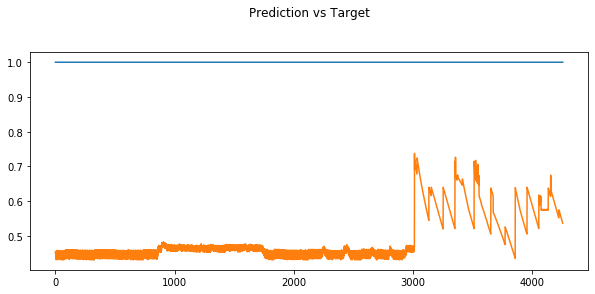

In [222]:
fig = plt.figure(figsize=(10, 4))
plt.title("Prediction vs Target\n \n")
plt.plot(intr_test_qda_t)
plt.plot(y_pckt)
plt.show()

The code given below calculates the F1 score of the model created by Pocket algorithm.

In [223]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('F1 score:', f1_score(intr_test_qda_t[0], y_pckt.round()))


F1 score: 0.42812326997601036


### C. QDA

For the QDA algorithm I am mainly considering only 4 features, it is beacause when I tested the test data, it has mostly all features values as zeros. And hence the mean and sigma values becomes near zero. This does not calculate the inverse of sigma, giving the singular matrix error.

In [12]:
intr_df_x = intr_df.iloc[:,0:35]
intr_df_t = intr_df.iloc[:,35:36]

intr_df_qda_x = intr_df.iloc[:,0:35]
intr_df_qda_t = intr_df.iloc[:,35:36]

intr_df_x = intr_df_x.join(new_df_x)
intr_df_t = intr_df_t.join(new_df_t)


intr_df_qda_x = intr_df_qda.loc[intr_df_qda['target'].isin([0,1])]
intr_df_qda_t = intr_df_qda['target']

intr_df_t = intr_df_t.drop(columns=['label'])
intr_df_qda_t = intr_df_qda_t.drop(columns=['label'])

In [13]:
Xlst, Tlst = partition(pd.DataFrame(intr_df_qda_x), pd.DataFrame(intr_df_qda_t))
intr_train_qda_x, intr_test_qda_x = [i.values for i in Xlst]
intr_train_qda_t, intr_test_qda_t = [j.values for j in Tlst]


k....r 0 0.8
rows:  17038
k....r 1 0.2
rows:  4259


In [14]:
print(intr_df_qda_x.shape)
intr_train_qda_x = pd.DataFrame(intr_train_qda_x)
intr_train_qda_t = pd.DataFrame(intr_train_qda_t)

c1_x = intr_train_qda_x.loc[intr_train_qda_t[0]==0]
c2_x = intr_train_qda_x.loc[intr_train_qda_t[0]==1]
print(c1_x.shape)
print(c2_x.shape)
c1_t = intr_train_qda_t.loc[intr_train_qda_t[0]==0]
c2_t = intr_train_qda_t.loc[intr_train_qda_t[0]==1]
print(c1_t.shape)
print(c2_t.shape)

(21297, 39)
(7787, 39)
(9251, 39)
(7787, 1)
(9251, 1)


In [15]:
# print(intr_df_qda_t.unique())
# print(intr_df_qda_t.value_counts())
print(c1_x.columns)
# c1_x = c1_x.drop(columns=[1, 5, 6, 36, 37])
# c2_x = c2_x.drop(columns=[1, 5, 6, 36, 37])

print(c1_x.shape)
print(c2_x.shape)

c1_x = c1_x.loc[:,17:20]
c2_x = c2_x.loc[:,17:20]

print(c1_x.shape)
print(c2_x.shape)

intr_test_qda_x = pd.DataFrame(intr_test_qda_x)
intr_test_qda_x = intr_test_qda_x.loc[:,17:20]
intr_test_qda_x = pd.DataFrame(intr_test_qda_x)
#intr_train_qda_x = (intr_train_qda_x - intr_train_qda_x.mean()) / (intr_train_qda_x.max() - intr_train_qda_x.min())
Xtrain = np.concatenate((c1_x, c2_x),axis=0)


RangeIndex(start=0, stop=39, step=1)
(7787, 39)
(9251, 39)
(7787, 4)
(9251, 4)


In [16]:
Xtrain = pd.DataFrame(Xtrain)

# Xtrain = Xtrain.loc[:,:6]
# print(Xtrain[0].unique())
# print(intr_test_qda_x[17].unique())
#intr_test_qda_x = intr_test_qda_x.loc[:,:3]

intr_test_qda_x = pd.DataFrame(intr_test_qda_x)
intr_test_qda_x[0], intr_test_qda_x[1],intr_test_qda_x[2],intr_test_qda_x[3] = intr_test_qda_x[17], intr_test_qda_x[18], intr_test_qda_x[19],intr_test_qda_x[20]
intr_test_qda_x = intr_test_qda_x.drop(columns=[17, 18, 19, 20])

#intr_test_qda_x = intr_test_qda_x.drop(columns=[1, 5, 6, 36, 37])
#intr_test_qda_x = intr_test_qda_x.drop(columns=['protocol_type', 'label', 'Main_label'])
# print("intr_test::  ", intr_test_qda_x[3].unique())

In [17]:
N1 = c1_x.shape[0]
N2 = c2_x.shape[0]
N = N1 + N2

In [18]:
import sys
class QDA_algo ():
    def __init__(self):
        self.mu1=None
        self.Sigma1=None
        self.Sigma2=None 
        self.d1=None
        self.d2=None
        self.prior1=None
        self.mu2=None
        self.prior2=None
    
    def QDA(self, X, mu, sigma, prior):
        mu = np.asarray(mu)
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diffv  @ sigma_inv * diffv, axis=1) + np.log(prior)

#np.sum(np.dot(diffv, sigma_inv) * diffv, axis=1) \

# QDA train
    def train(self, Xtrain):
        ## compute the mean and covariance
        Xtrain = Xtrain.astype(float)
        # print("Xtrain: ", Xtrain.shape)
        means= Xtrain.mean()
        stds = np.sqrt(np.mean(abs(Xtrain - Xtrain.mean())**2))

        Xs = (Xtrain - means) / stds
        print
        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)

        self.Sigma1 = np.cov(Xs[:N1].T)

        self.Sigma2 = np.cov(Xs[N1:].T)
        
        self.prior1 = N1 / N
        self.prior2 = N2 / N
        return self.mu1, self.mu2, self.Sigma1, self.Sigma2, self.prior1, self.prior2
        
    def use(self, Xtest):
        d1_qda = self.LDA(Xtest, self.mu1, self.Sigma1, self.prior1)
        d2_qda = self.LDA(Xtest, self.mu2, self.Sigma2, self.prior2)
        return np.where(d1_qda>d2_qda,0,1)



### Explanation of code QDA

The QDA algorithm works on prior probabilities, which are calculated for each positive and negative class. Here in this code, class c1_x has all the classes having target values as zero (meaning negative class - Normal network traffic) and the class c2_x have target values one (Denial of service attack - DOS).

N1 and N2 are the number of samples in Class 1 and Class 2 respectively. Similarly, mu1 and mu2 are means and the sigma1 and sigma2 are the covariance of these classes. The probabilities of these classes are stored in prior1 and prior2 variables.

The function QDA will calculate the discriminant values for each classes. The use method uses the discriminant values and takes the larger value of those and assigns one or zero accordingly.

In [19]:
qda = QDA_algo()
mu1, mu2, Sigma1, Sigma2, prior1, prior2 = qda.train(Xtrain)
d1_qda = qda.QDA(intr_test_qda_x, mu1, Sigma1, prior1)

print("d1_qda", d1_qda)
d2_qda = qda.QDA(intr_test_qda_x, mu2, Sigma2, prior2)
print(" d2_qda ", d2_qda)

d1_qda 0      -4.209468e+07
1      -4.485986e+07
2      -4.972567e+07
3      -5.009231e+07
4      -5.925881e+07
5      -6.187612e+07
6      -6.522234e+07
7      -6.798719e+07
8      -3.604269e+07
9      -3.809362e+07
10     -4.312728e+07
11     -4.536874e+07
12     -4.796103e+07
13     -5.418345e+07
14     -5.952105e+07
15     -5.991116e+07
16     -6.550447e+07
17     -6.929265e+07
18     -3.604269e+07
19     -4.015969e+07
20     -4.073222e+07
21     -4.592409e+07
22     -5.084723e+07
23     -5.121250e+07
24     -5.639134e+07
25     -6.312563e+07
26     -6.616925e+07
27     -6.929265e+07
28     -3.604269e+07
29     -3.809362e+07
            ...     
4229   -5.593733e+03
4230   -8.220842e+03
4231   -1.135321e+04
4232   -1.499084e+04
4233   -1.913373e+04
4234   -2.378188e+04
4235   -2.893529e+04
4236   -3.459396e+04
4237   -4.075789e+04
4238   -4.742708e+04
4239   -5.460153e+04
4240   -6.228124e+04
4241   -7.046621e+04
4242   -7.915644e+04
4243   -8.835193e+04
4244   -9.805268e+04
4245  

## Experiment QDA

### Calculating accuracy QDA

Since d1 (Discriminant one) is associated with target value of 0 i.e. (class=0) and d2 (Discriminant two) has target value of 1 i.e (class=1). we can predict the labels by using the formula: 
$$y = \arg\max_k \delta_k(\tilde{x}). $$
Hence the accuracy can be calculated by finding the mean of difference in target values and predicted values.
In this case the accuracy is 100% because I have considered only 4 features.

In [20]:
pred_qda=np.where(d1_qda>d2_qda,0,1)

#print(intr_test_qda_t.shape)
print("Accuracy: ", 100 - np.mean(np.abs(intr_test_qda_t - pred_qda)) * 100, "%")

Accuracy:  100.0 %


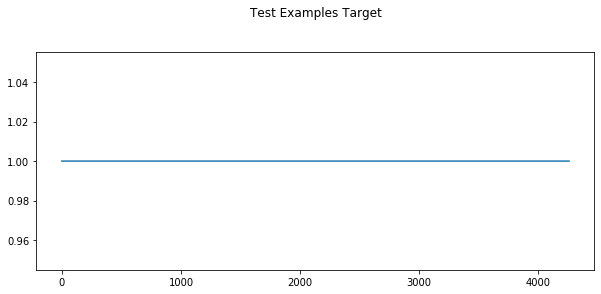

In [233]:
fig = plt.figure(figsize=(10, 4))
plt.title("Test Examples Target\n \n")
plt.plot(intr_test_qda_t)
plt.show()

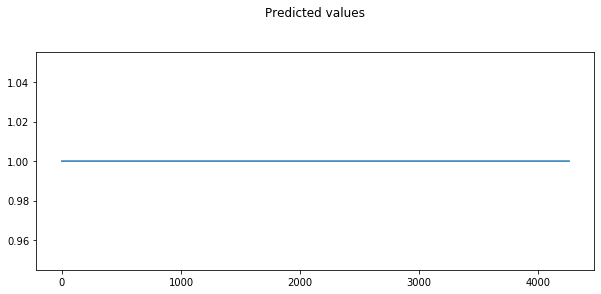

In [234]:
fig = plt.figure(figsize=(10, 4))
plt.title("Predicted values\n \n")
plt.plot(pred_qda)
plt.show()

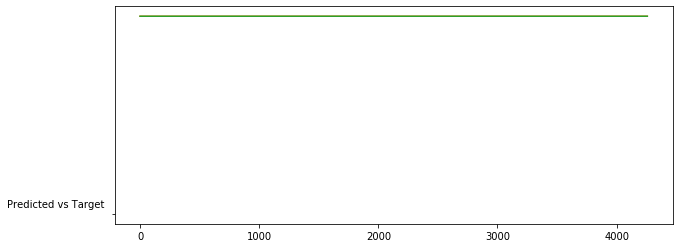

In [235]:
fig = plt.figure(figsize=(10, 4))
plt.plot("Predicted vs Target \n\n")
plt.plot(intr_test_qda_t)
plt.plot(pred_qda)
plt.show()

For this model the F1 score is 1 because the accuracy model is 100%

In [24]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

print('F1 score:', f1_score(intr_test_qda_t, pred_qda))


F1 score: 1.0


In [26]:
conf=confusion_matrix(intr_test_qda_t, pred_qda)
print("Confusion matrix:", conf)

Confusion matrix: [[4259]]


### D. LDA

In [27]:
# define LDA discriminant function
class LDA_algo():
    def __init__(self):
        self.mu1=None
        self.Sigma=None        
        self.d1=None
        self.d2=None
        self.prior1=None
        self.mu2=None
        self.prior2=None
        
    def LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum((X @ sigma_inv) * mu \
                    - 0.5 * (mu @ sigma_inv) * mu, axis=1) \
                    + np.log(prior)
# LDA train

## compute the mean and covariance
    def train(self, Xtrain):
        Xtrain = Xtrain.astype(float)
        means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        Xs = (Xtrain - means) / stds

        self.mu1 = np.mean(Xs[:N1], 0)
        self.mu2 = np.mean(Xs[N1:], 0)

        self.Sigma = np.cov(Xs.T)
        self.prior1 = N1 / N
        self.prior2 = N2 / N
        return self.mu1, self.mu2, self.Sigma, self.prior1, self.prior2

    def use(self, Xtest):
        d1_lda = self.LDA(Xtest, self.mu1, self.Sigma, self.prior1)
        d2_lda = self.LDA(Xtest, self.mu2, self.Sigma, self.prior2)
        return np.where(d1_lda>d2_lda,0,1)
 


## Explanation of LDA
The LDA implementation is very similar to the implementation of QDA. The LDA algorithm also works on prior probabilities, which are calculated for each positive and negative class. Here in this code, class c1_x has all the classes having target values as zero (meaning negative class - Normal network traffic) and the class c2_x have target values one (Denial of service attack - DOS).

N1 and N2 are the number of samples in Class 1 and Class 2 respectively. Similarly, mu1 and mu2 are means of these classes. The probabilities of these classes are stored in prior1 and prior2 variables. In LDA the ony difference is that we take only one covariance matrix Sigma.

The function LDA will calculate the discriminant values for each classes. The use method uses the discriminant values and takes the larger value of those and assigns one or zero accordingly.

In [28]:
lda = LDA_algo()
mu1, mu2, Sigma, prior1, prior2 = lda.train(Xtrain)
d1_lda = lda.LDA(intr_test_qda_x, mu1, Sigma, prior1)
d2_lda = lda.LDA(intr_test_qda_x, mu2, Sigma, prior2)
print(d1_lda)
print(d2_lda)

0      -364.751302
1      -377.105141
2      -396.463435
3      -399.811545
4      -432.178113
5      -442.530678
6      -454.884516
7      -465.237082
8      -337.311084
9      -347.663649
10     -369.023216
11     -379.375781
12     -390.728983
13     -414.089823
14     -433.448117
15     -436.796227
16     -456.154520
17     -469.508995
18     -337.311084
19     -355.668741
20     -360.017487
21     -381.377054
22     -400.735348
23     -404.083458
24     -423.441752
25     -446.802591
26     -458.155793
27     -469.508995
28     -337.311084
29     -347.663649
           ...    
4229     -3.640844
4230     -4.275846
4231     -4.910848
4232     -5.545850
4233     -6.180851
4234     -6.815853
4235     -7.450855
4236     -8.085857
4237     -8.720859
4238     -9.355861
4239     -9.990863
4240    -10.625865
4241    -11.260867
4242    -11.895869
4243    -12.530871
4244    -13.165873
4245    -13.800875
4246    -14.435877
4247    -15.070879
4248    -15.705881
4249    -16.340883
4250    -16.

## Experiment with LDA

### Calculating accuracy LDA
Accuracy of LDA is calculated in similar way as that of QDA.
Since d1 (Discriminant one) is associated with target value of 0 i.e. (class=0) and d2 (Discriminant two) is associated with target value of 1 i.e (class=1). we can predict the labels by using the formula: 
$$y = \arg\max_k \delta_k(\tilde{x}). $$
Hence the accuracy can be calculated by finding the mean of difference in target values and predicted values.
In this case the accuracy is 100% because I have considered only 4 features.

In [29]:
pred_lda=np.where(d1_lda>d2_lda,0,1)

print("Accuracy: ", 100 - np.mean(np.abs(intr_test_qda_t - pred_lda)) * 100, "%")

Accuracy:  96.26672927917352 %


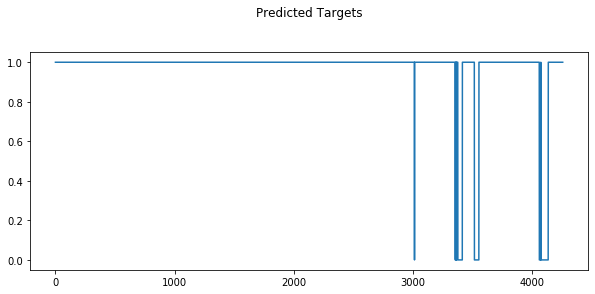

In [239]:
fig = plt.figure(figsize=(10, 4))
plt.title("Predicted Targets\n \n")
plt.plot(pred_lda)
plt.show()

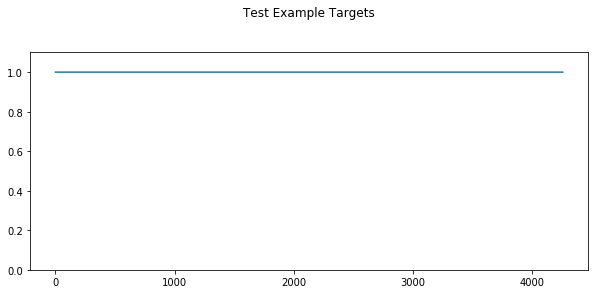

In [240]:
fig = plt.figure(figsize=(10, 4))
plt.title("Test Example Targets\n \n")
plt.plot(intr_test_qda_t)
plt.ylim([0,1.1])
plt.show()

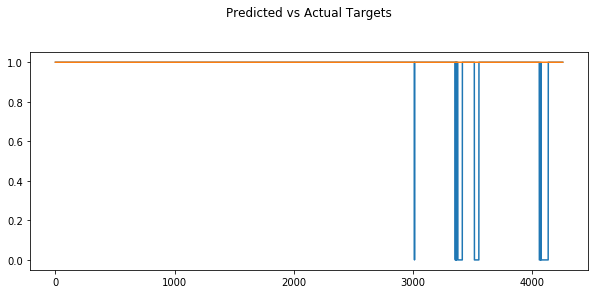

In [241]:
fig = plt.figure(figsize=(10, 4))
plt.title("Predicted vs Actual Targets\n \n")
plt.plot(pred_lda)
plt.plot(intr_test_qda_t)
plt.show()

In [31]:

print('F1 score:', f1_score(intr_test_qda_t, pred_lda))
conf=confusion_matrix(intr_test_qda_t, pred_lda)
print("Confusion matrix:\n", conf)

F1 score: 0.9809785859552579
Confusion matrix:
 [[   0    0]
 [ 159 4100]]


### E. Logistic Regression

In [58]:
class LogisticRegression(Classifier):
    
    def __init__(self):
        self.w = np.random.rand(intr_train_x.shape[1]+1, intr_train_t.shape[1])
    
# g(.) the softmax function
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z)
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self, X, w):
        return self.softmax(X @ w) 

    def train(self, X, T):
        Xtrain = self.normalize(X)
        epoch = 1500
        alpha = 0.001

        X1 = self.add_ones(X)

        for step in range(epoch):
            ys = self.g(X1, self.w)
            self.w += alpha * X1.T @ (T - ys)
        
        return self.w
    
    def use(self, X):
        X1 = self.add_ones(X)
        y = self.g(X1, self.w)
        return y

## Explanation of code

I have implemented logistic regression on 5 classes. 
Before implementing this code, lot of pre-processing was done to get the vectorized format of target values. These vectorized target values are passed to the train method along with the feature vectors. <br>In this code, maximum epoch are set to 1500 with the learning rate of 0.001. The weights are updated by using the formula given in overview of algorithms. The softmax function outputs the predicted values and ranges between 0 to 1.
In the above code train function gives call to g function which calls the softmax function. The use method just uses the weights calculated in train method and predicts the values of test data.

In [59]:
lr = LogisticRegression()
intr_train_x = (intr_train_x - intr_train_x.mean()) / (intr_train_x.max() - intr_train_x.min())
w_logistic = lr.train(intr_train_x, intr_train_t)
print(w_logistic)

[[ 2.48327211e+00  2.44993922e+00 -9.43991437e-01 -1.81207785e+00
   2.87998084e-01]
 [ 8.19526591e-01  7.42763472e-01  1.23442161e-01  8.88721972e-03
   9.89749407e-01]
 [ 5.30048205e+01 -4.67355167e+01  1.22502601e-01  1.91040322e-01
  -4.10533487e+00]
 [-1.97040497e+01  2.02888698e+01  3.38073309e+00  9.27647403e-01
  -1.61280344e+00]
 [ 4.46749200e-01  2.71079664e-01  7.11877439e-01  6.80316068e-02
   8.12460147e-01]
 [ 9.57431971e-01  5.54918445e-01  1.83362443e-01  4.88429845e-02
   9.93442427e-01]
 [ 8.26969303e-01  4.97586940e-01  1.00556717e-01  2.52438087e-01
   7.55079345e-02]
 [ 1.47212913e-01  7.68212563e-01  3.52769166e-03  2.54660621e-01
   1.98098607e-01]
 [ 2.25066571e-01  3.00810273e-01  4.06033975e-01  4.12749597e-01
   9.69211012e-01]
 [ 8.90247935e-01  3.44847245e-01  4.43803663e-01  5.72144643e-01
   9.48481365e-01]
 [ 6.03556109e-01  3.42785710e-01  3.88489545e-01  1.10400938e-01
   4.95799041e-01]
 [ 6.00779355e-01  2.17160690e-01  8.72476807e-01  8.28412159e-01

In [60]:
intr_test_x = (intr_test_x - intr_test_x.mean()) / (intr_test_x.max() - intr_test_x.min())

Y_logistic = lr.use(intr_test_x)


## Experiment (Logistic regression)

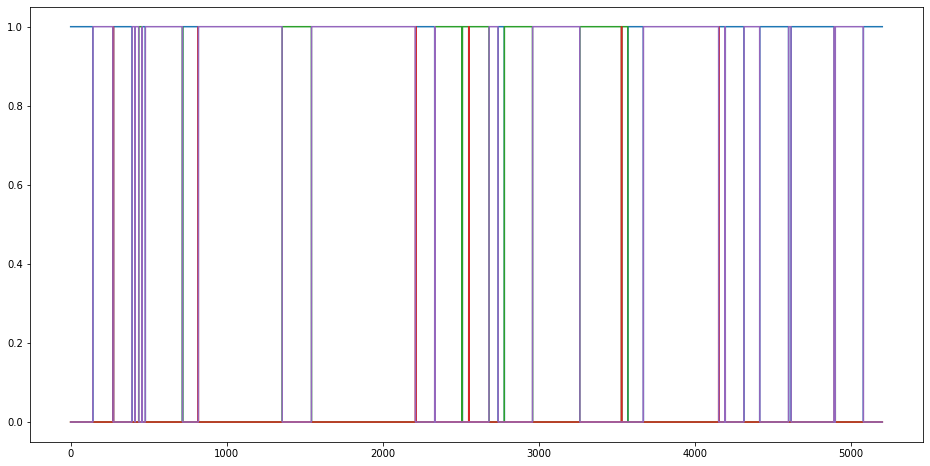

In [417]:
fig = plt.figure(figsize=(16, 8))

plt.title("Classes in Actual data\n \n")
plt.plot(intr_test_t)
plt.show()

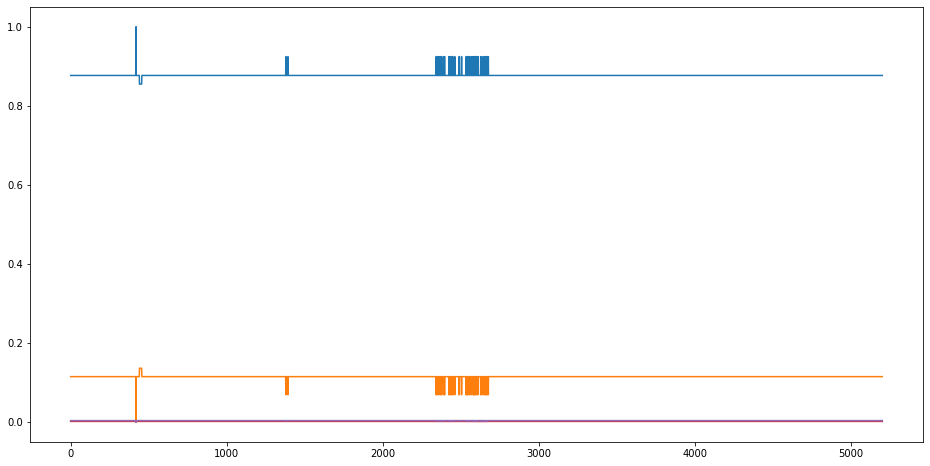

In [418]:
fig = plt.figure(figsize=(16, 8))

plt.title("Predicted target values\n \n")
plt.plot(Y_logistic)
plt.show()

(5203, 5)
Accuracy:  66.2545935031628 %


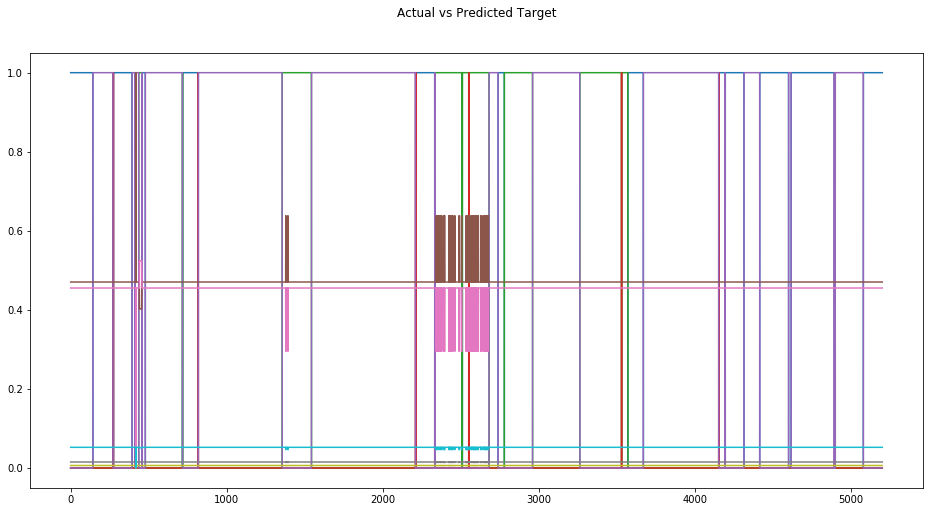

In [61]:

print(Y_logistic.shape)
fig = plt.figure(figsize=(16, 8))

plt.title("Actual vs Predicted Target\n \n")
plt.plot(intr_test_t)
plt.plot(Y_logistic)

print("Accuracy: ", 100 - np.mean(np.abs(intr_test_t - Y_logistic)) * 100, "%")

# Conclusions

In this assignment I learnt about the working of pocket algorithm, LDA, QDA and logistic  regression algorithm. We implemented both the binary as well as multi-class classification. The data is visualized and used in these various algorithms. Each trained model gave different accuracies on the test data.

Even though the accuracy of QDA, LDA is high, these are good algorithms for binary classification problem. Also these algorithms will perform better if the data is gaussian distributed.
For dataset having large number features, **Logistic Regression** performs very well and is the best amongst these. In this assignment, even after considering almost all the features, and considering the multi-class classification (DOS, R2L, U2R, probing and Normal traffic (No attack)) the logistic regression algorithm was able to classify between multiple classes.

The main challege was to clean the raw data. As the data I used here is a network traffic data, and hence many of the features in the dataset have zero values (e.g. number failed login attemts is zero for most of the times) hence the mean of such columns remains very close to zero and gave "NaN" values after normalization. Handling this was a challeging task.


# References

Class Note : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Linear%20Model.Sol.ipynb

Class Note : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/ForestFire.ipynb

Class Note : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/wb/WB-Classification.ipynb

KDD Cup 1999 Data, http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html.

Sungkwan Youm, Eui-Jik Kim “A Fast Probing Detection Method Using Hybrid Machine Learning Algorithms.” ACM Digital Library, ACM, https://dl.acm.org/citation.cfm?id=3326615&dl=ACM&coll=DL#.

Swaminathan, Saishruthi. “Logistic Regression - Detailed Overview.” Medium, Towards Data Science, 18 Jan. 2019, https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc.

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 



points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)